In [2]:
import pandas as pd
import numpy as np
import sys, os, re
import matplotlib.pyplot as plt

from importlib import reload

if re.match(r'^(\w\:\\)|(/)', os.getcwd()):
    sys.path.insert(0, "c:/Users/dmitr/devs/quantl/")
    sys.path.insert(0, "c:/Users/dmitr/devs/Qube2exp/src/")
    # sys.path.insert(0, "c:/Users/dmitr/devs/Qube/")
    print('installed')

installed


# Experiment 1

In [3]:
%load_ext autoreload
%autoreload 2

from qube.utils import reload_pyx_module

reload_pyx_module('../../src/qube/core/')
from qube.core.cseries import TimeItem
del sys.modules['qube.core.cseries']
from qube.core.cseries import TimeItem, Float, TimeSeries, FloatSeries, Sma, time_to_str, Ema, recognize_time

T = pd.date_range('2024-01-01 00:00', freq='5Min', periods=50_000)

 > Reloaded ../../src/qube/core\cseries.pyx
 > Reloaded ../../src/qube/core\cseries1.pyx
 > Reloaded c:\Users/dmitr/devs/Qube2exp/src\qube\core\cseries.pyx
 > Reloaded c:\Users/dmitr/devs/Qube2exp/src\qube\core\cseries1.pyx


In [4]:
%%timeit
ts = FloatSeries('test1', '5Min')
ts.update(Float(recognize_time('2024-01-01 00:00'), 1))
ts.update(Float(recognize_time('2024-01-01 00:06'), 2))
ts.update(Float(recognize_time('2024-01-01 00:12'), 3))
ts.update(Float(recognize_time('2024-01-01 00:21'), 4))
ts.update(Float(recognize_time('2024-01-01 00:22'), 5))
ts.update(Float(recognize_time('2024-01-01 00:31'), 6))
ts.update(Float(recognize_time('2024-01-01 00:33'), 7))
ts.update(Float(recognize_time('2024-01-01 00:45'), 12, 'test1'))
ts.update(Float(recognize_time('2024-01-01 00:55'), 12, 'test2'))
# print(ts)

32.1 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
ts[::-1]

In [8]:
# %%timeit
# sma(pd.Series(dict(zip(t, range(len(t))))), 25)

87.7 ms ± 897 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [101]:
T = pd.date_range('2024-01-01 00:00', freq='1Min', periods=100_000)
data = list(zip(T, 1 + (2*np.random.randn(len(T))).cumsum()))

In [102]:
%%timeit
s0 = Ema(100)
s1 = Sma(100)
# s2 = Sma(50)
fs = FloatSeries('close', '1h').attach(s0)#.attach(s1)#.attach(s2)
[fs.update(Float(ti.asm8, vi)) for ti, vi in data];

388 ms ± 30.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


: 

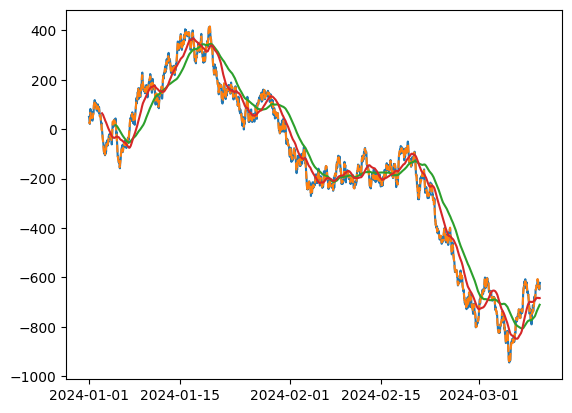

In [93]:
v0 = pd.Series({np.datetime64(v.time, 'ns'): v.v for v in fs})
ma0 = pd.Series({np.datetime64(v.time, 'ns'): v.v for v in s0.values})
ma1 = pd.Series({np.datetime64(v.time, 'ns'): v.v for v in s1.values})
ma2 = pd.Series({np.datetime64(v.time, 'ns'): v.v for v in s2.values})
plt.plot(v0)
plt.plot(ma0, ls='--')
plt.plot(ma1)
plt.plot(ma2)

In [18]:
print(s1.values)

sma(100)[1H] | 0 records



In [51]:
ti = np.datetime64('2023-01-01 10:32:12.001')
dt = np.timedelta64(600, 's')

In [52]:
ti.astype(int)

1826853857

In [53]:
dt.astype(int)

600

In [79]:
%load_ext cython

In [184]:
%%cython

from cython.view cimport array
from qube.core.cseries import TimeItem, Float
cimport numpy as np

cdef memviewprops(int[:] x):
    print('{:10}:{}'.format('shape',x.shape))
    print('{:10}:{}'.format('strides', x.strides))
    print('{:10}:{}'.format('suboffsets', x.suboffsets))
    print('{:10}:{}'.format('ndim', x.ndim))
    print('{:10}:{}'.format('size', x.size))
    print('{:10}:{}'.format('itemsize', x.itemsize))
    print('{:10}:{}'.format('nbytes', x.nbytes))
    return 
   
def cythonviewprops(n):
    x_cython = array(shape=(n,), itemsize=sizeof(Float), format='P')
    return x_cython
    # x_cython.extend()
    # memviewprops(x_cython)

np.zeros((1,), dtype='i')


Error compiling Cython file:
------------------------------------------------------------
...
    x_cython = array(shape=(n,), itemsize=sizeof(Float), format='P')
    return x_cython
    # x_cython.extend()
    # memviewprops(x_cython)

np.zeros((1,), dtype='i')
 ^
------------------------------------------------------------

C:\Users\dmitr\.ipython\cython\_cython_magic_bf1e9fb5c6097cee6b592b3c7578032a.pyx:22:2: cimported module has no attribute 'zeros'


In [186]:
r = cythonviewprops(2)

In [ ]:
# r[0] = Float(t0, 12.0)